## Single Layer Perceptron with Stochastic Gradient Descent

In [1]:
#Reading the data set and taking only 2 classes
import pandas as pd 
import numpy as np

data = pd.read_csv('irisdata.csv',header=None)

data = data[data[4] != 'Iris-versicolor']
data[4] = data[4].str.replace('Iris-setosa','1')
data[4] = data[4].str.replace('Iris-virginica','0')

data = data.astype('float64')

data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,1.0
1,4.9,3.0,1.4,0.2,1.0
2,4.7,3.2,1.3,0.2,1.0
3,4.6,3.1,1.5,0.2,1.0
4,5.0,3.6,1.4,0.2,1.0


In [2]:
#Initialisations of variables
alpha = 0.8
theta = np.array([0.2,0.3,0.3,0.2])
bias = 0.3

d_bias = 0
h = 0
array_dtheta = np.empty(4)
total_error = np.zeros(60)

In [3]:
#Defining functions
import math as mt

def h(x,theta,bias,n):
    return np.dot(x.iloc[n,:4],np.transpose(theta)) + bias

def sigmoid(h):
    return 1/(1+mt.exp(-h))

def error(sigmoid,n):
    return (sigmoid-data.iloc[n,4])**2

def prediction(sigmoid):
    if sigmoid >= 0.5:
        prediction = 1
        return prediction
    else:
        prediction = 0
        return prediction

def d_theta(sigmoid,fact,x_array,i):
    return 2*(sigmoid-fact)*(1-sigmoid)*sigmoid*x_array[i]

def d_bias(sigmoid,fact):
    return 2*(sigmoid-fact)*(1-sigmoid)*sigmoid

def new_theta(theta,alpha,d_theta,i):
    return theta[i]-(alpha*d_theta[i])

def new_bias(bias,alpha,d_bias):
    return bias-(alpha*d_bias)

def to_bias(bias,alpha,d_bias_value):
    bias = new_bias(bias,alpha,d_bias_value)

In [4]:
#Calculation
for n in range(60):
    total = 0
    print('=======================================')
    
    for i in range(100):
        print('Row: ', i)
        print('')
        
        x_array = np.array(data.iloc[i,:4])
        print('x1,x2,x3,x4: ', x_array)
        
        fact = data.iloc[i,4]
        print('fact: ', fact)
        
        print('----------------------')
        
        h_value = h(data,theta,bias,i)
        print('h: ', h_value)
        
        sigmoid_value = sigmoid(h_value)
        print('sigmoid: ', sigmoid_value)
        
        error_value = error(sigmoid_value,i)
        print('error: ', error_value)
        total += error_value
        
        prediction_value = prediction(sigmoid_value)
        print('prediction: ', prediction_value)
                
        for j in range(len(x_array)):
            array_dtheta[j] = d_theta(sigmoid_value,fact,x_array,j)
            print('d_theta ',j ,' : ',  array_dtheta[j])

        
        d_bias_value = d_bias(sigmoid_value,fact)
        print('d_bias: ', d_bias_value)
        
        for j in range(len(theta)):
            theta[j] = new_theta(theta,alpha,array_dtheta,j)
            print('new_theta ',j ,' : ', theta[j])
        
        to_bias(bias,alpha,d_bias_value)
        
        print('----------------------')
        print('total: ',total)
        print('\n')
        
    total_error[n] = total
    print('=======================================')
    print('total error: ', total_error[n])
    print('\n')
    

 
        

Row:  0

x1,x2,x3,x4:  [ 5.1  3.5  1.4  0.2]
fact:  1.0
----------------------
h:  2.83
sigmoid:  0.9442756020713345
error:  0.00310520852451
prediction:  1
d_theta  0  :  -0.0299081610202
d_theta  1  :  -0.0205252085433
d_theta  2  :  -0.00821008341731
d_theta  3  :  -0.00117286905962
d_bias:  -0.00586434529808
new_theta  0  :  0.223926528816
new_theta  1  :  0.316420166835
new_theta  2  :  0.306568066734
new_theta  3  :  0.200938295248
----------------------
total:  0.00310520852451


Row:  1

x1,x2,x3,x4:  [ 4.9  3.   1.4  0.2]
fact:  1.0
----------------------
h:  2.81588344418
sigmoid:  0.943528124850763
error:  0.00318907268287
prediction:  1
d_theta  0  :  -0.0294880017311
d_theta  1  :  -0.0180538786109
d_theta  2  :  -0.00842514335175
d_theta  3  :  -0.00120359190739
d_bias:  -0.00601795953696
new_theta  0  :  0.247516930201
new_theta  1  :  0.330863269723
new_theta  2  :  0.313308181415
new_theta  3  :  0.201901168774
----------------------
total:  0.00629428120738


Row:  2


new_theta  1  :  0.416898893786
new_theta  2  :  0.35045744584
new_theta  3  :  0.207444470536
----------------------
total:  0.0231906981933


Row:  30

x1,x2,x3,x4:  [ 4.8  3.1  1.6  0.2]
fact:  1.0
----------------------
h:  3.98555448902
sigmoid:  0.9817568586928894
error:  0.000332812204751
prediction:  1
d_theta  0  :  -0.00313671038084
d_theta  1  :  -0.00202579212096
d_theta  2  :  -0.00104557012695
d_theta  3  :  -0.000130696265868
d_bias:  -0.000653481329342
new_theta  0  :  0.375623349729
new_theta  1  :  0.418519527482
new_theta  2  :  0.351293901941
new_theta  3  :  0.207549027549
----------------------
total:  0.0235235103981


Row:  31

x1,x2,x3,x4:  [ 5.4  3.4  1.5  0.4]
fact:  1.0
----------------------
h:  4.36129294591
sigmoid:  0.9873989366531842
error:  0.00015878679747
prediction:  1
d_theta  0  :  -0.00169328788175
d_theta  1  :  -0.00106614422184
d_theta  2  :  -0.000470357744931
d_theta  3  :  -0.000125428731982
d_bias:  -0.000313571829954
new_theta  0  :  0.37

new_theta  2  :  0.110363116873
new_theta  3  :  0.117485412587
----------------------
total:  6.96471806611


Row:  57

x1,x2,x3,x4:  [ 7.3  2.9  6.3  1.8]
fact:  0.0
----------------------
h:  3.05102557608
sigmoid:  0.9548267829169105
error:  0.911694185375
prediction:  1
d_theta  0  :  0.601288726501
d_theta  1  :  0.238868124226
d_theta  2  :  0.518920407802
d_theta  3  :  0.148262973658
d_bias:  0.0823683186987
new_theta  0  :  -0.350337401223
new_theta  1  :  0.115871384512
new_theta  2  :  -0.304773209368
new_theta  3  :  -0.0011249663395
----------------------
total:  7.87641225149


Row:  58

x1,x2,x3,x4:  [ 6.7  2.5  5.8  1.8]
fact:  0.0
----------------------
h:  -3.52729168066
sigmoid:  0.028545595582155626
error:  0.00081485102714
prediction:  0
d_theta  0  :  0.0106073142981
d_theta  1  :  0.0039579530963
d_theta  2  :  0.00918245118341
d_theta  3  :  0.00284972622933
d_bias:  0.00158318123852
new_theta  0  :  -0.358823252662
new_theta  1  :  0.112705022035
new_theta  2 

total:  7.88546341452


Row:  82

x1,x2,x3,x4:  [ 6.4  2.8  5.6  2.2]
fact:  0.0
----------------------
h:  -4.48973817079
sigmoid:  0.011099011420785933
error:  0.000123188054519
prediction:  0
d_theta  0  :  0.00155930609785
d_theta  1  :  0.00068219641781
d_theta  2  :  0.00136439283562
d_theta  3  :  0.000536011471137
d_bias:  0.000243641577789
new_theta  0  :  -0.440699296733
new_theta  1  :  0.0750495547309
new_theta  2  :  -0.380408101192
new_theta  3  :  -0.0298562207089
----------------------
total:  7.88558660257


Row:  83

x1,x2,x3,x4:  [ 6.3  2.8  5.1  1.5]
fact:  0.0
----------------------
h:  -4.25113246331
sigmoid:  0.014047933124625649
error:  0.000197344425074
prediction:  0
d_theta  0  :  0.00245160901173
d_theta  1  :  0.00108960400521
d_theta  2  :  0.00198463586664
d_theta  3  :  0.000583716431364
d_bias:  0.000389144287576
new_theta  0  :  -0.442660583942
new_theta  1  :  0.0741778715267
new_theta  2  :  -0.381995809885
new_theta  3  :  -0.030323193854
----------

d_theta  0  :  -0.144479815426
d_theta  1  :  -0.0884570298526
d_theta  2  :  -0.0412799472645
d_theta  3  :  -0.00589713532351
d_bias:  -0.0294856766175
new_theta  0  :  0.22938527669
new_theta  1  :  0.53080581303
new_theta  2  :  -0.206780453921
new_theta  3  :  -0.0090001556157
----------------------
total:  0.855967891116


Row:  2

x1,x2,x3,x4:  [ 4.7  3.2  1.3  0.2]
fact:  1.0
----------------------
h:  2.80607478092
sigmoid:  0.9430032124036402
error:  0.0032486337963
prediction:  1
d_theta  0  :  -0.0287966377949
d_theta  1  :  -0.0196062214774
d_theta  2  :  -0.00796502747518
d_theta  3  :  -0.00122538884234
d_bias:  -0.00612694421168
new_theta  0  :  0.252422586926
new_theta  1  :  0.546490790212
new_theta  2  :  -0.200408431941
new_theta  3  :  -0.00801984454184
----------------------
total:  0.859216524912


Row:  3

x1,x2,x3,x4:  [ 4.6  3.1  1.5  0.2]
fact:  1.0
----------------------
h:  2.8530487327
sigmoid:  0.945476061862539
error:  0.00297285983002
prediction:  1
d_t

d_theta  2  :  -0.000614392227196
d_theta  3  :  -0.000122878445439
d_bias:  -0.000614392227196
new_theta  0  :  0.361940175567
new_theta  1  :  0.621593219213
new_theta  2  :  -0.167478158045
new_theta  3  :  -0.00325982416077
----------------------
total:  0.874068314399


Row:  23

x1,x2,x3,x4:  [ 5.1  3.3  1.7  0.5]
fact:  1.0
----------------------
h:  3.91080973804
sigmoid:  0.9803688201691696
error:  0.00038538322155
prediction:  1
d_theta  0  :  -0.00385374048109
d_theta  1  :  -0.00249359678188
d_theta  2  :  -0.00128458016036
d_theta  3  :  -0.000377817694224
d_bias:  -0.000755635388449
new_theta  0  :  0.365023167952
new_theta  1  :  0.623588096638
new_theta  2  :  -0.166450493917
new_theta  3  :  -0.0029575700054
----------------------
total:  0.874453697621


Row:  24

x1,x2,x3,x4:  [ 4.8  3.4  1.9  0.2]
fact:  1.0
----------------------
h:  3.8554632823
sigmoid:  0.9792748271093707
error:  0.000429532791346
prediction:  1
d_theta  0  :  -0.00403805423984
d_theta  1  :  -0

x1,x2,x3,x4:  [ 4.6  3.2  1.4  0.2]
fact:  1.0
----------------------
h:  4.10801462329
sigmoid:  0.9838255319429888
error:  0.000261613416927
prediction:  1
d_theta  0  :  -0.00236791402346
d_theta  1  :  -0.00164724453806
d_theta  2  :  -0.000720669485401
d_theta  3  :  -0.000102952783629
d_bias:  -0.000514763918144
new_theta  0  :  0.418627860906
new_theta  1  :  0.658203872795
new_theta  2  :  -0.15007259748
new_theta  3  :  -0.000349007289759
----------------------
total:  0.881542294757


Row:  48

x1,x2,x3,x4:  [ 5.3  3.7  1.5  0.2]
fact:  1.0
----------------------
h:  4.72890329446
sigmoid:  0.991241237406657
error:  7.67159221665e-05
prediction:  1
d_theta  0  :  -0.000806066247542
d_theta  1  :  -0.000562725493567
d_theta  2  :  -0.000228131956851
d_theta  3  :  -3.04175942469e-05
d_bias:  -0.000152087971234
new_theta  0  :  0.419272713904
new_theta  1  :  0.65865405319
new_theta  2  :  -0.149890091915
new_theta  3  :  -0.000324673214361
----------------------
total:  0.8816

new_theta  3  :  -0.346139821172
----------------------
total:  2.61984140332


Row:  66

x1,x2,x3,x4:  [ 6.5  3.   5.5  1.8]
fact:  0.0
----------------------
h:  -9.57919844828
sigmoid:  6.914757298918315e-05
error:  4.78138685029e-09
prediction:  0
d_theta  0  :  6.2153730977e-08
d_theta  1  :  2.8686337374e-08
d_theta  2  :  5.2591618519e-08
d_theta  3  :  1.72118024244e-08
d_bias:  9.562112458e-09
new_theta  0  :  -0.605515608088
new_theta  1  :  0.173635942615
new_theta  2  :  -1.06203704889
new_theta  3  :  -0.346139834942
----------------------
total:  2.6198414081


Row:  67

x1,x2,x3,x4:  [ 7.7  3.8  6.7  2.2]
fact:  0.0
----------------------
h:  -11.5798094648
sigmoid:  9.352949426137677e-06
error:  8.74776629679e-11
prediction:  0
d_theta  0  :  1.34714340982e-09
d_theta  1  :  6.64824020432e-10
d_theta  2  :  1.17218972024e-09
d_theta  3  :  3.84898117092e-10
d_bias:  1.74953689587e-10
new_theta  0  :  -0.605515609166
new_theta  1  :  0.173635942083
new_theta  2  :  -1.06

error:  5.58733888457e-09
prediction:  0
d_theta  0  :  7.15125918637e-08
d_theta  1  :  3.4638911684e-08
d_theta  2  :  6.14561336328e-08
d_theta  3  :  2.01129164617e-08
d_bias:  1.11738424787e-08
new_theta  0  :  -0.605517424843
new_theta  1  :  0.173635115803
new_theta  2  :  -1.06203855064
new_theta  3  :  -0.346140371006
----------------------
total:  2.61984159468


Row:  88

x1,x2,x3,x4:  [ 6.   3.   4.8  1.8]
fact:  0.0
----------------------
h:  -8.53303691252
sigmoid:  0.000196817481335
error:  3.87371209591e-08
prediction:  0
d_theta  0  :  4.64753961798e-07
d_theta  1  :  2.32376980899e-07
d_theta  2  :  3.71803169438e-07
d_theta  3  :  1.39426188539e-07
d_bias:  7.74589936329e-08
new_theta  0  :  -0.605517796646
new_theta  1  :  0.173634929901
new_theta  2  :  -1.06203884808
new_theta  3  :  -0.346140482547
----------------------
total:  2.61984163341


Row:  89

x1,x2,x3,x4:  [ 6.9  3.1  5.4  2.1]
fact:  0.0
----------------------
h:  -9.80170930714
sigmoid:  5.535383236

d_theta  3  :  -0.000166500796541
d_bias:  -0.00166500796541
new_theta  0  :  0.390916047929
new_theta  1  :  0.814633136352
new_theta  2  :  -0.777378587547
new_theta  3  :  -0.305275563461
----------------------
total:  1.82776559355


Row:  14

x1,x2,x3,x4:  [ 5.8  4.   1.2  0.2]
fact:  1.0
----------------------
h:  4.83193620565
sigmoid:  0.9920919628597503
error:  6.25370514116e-05
prediction:  1
d_theta  0  :  -0.000719693070602
d_theta  1  :  -0.000496340048691
d_theta  2  :  -0.000148902014607
d_theta  3  :  -2.48170024345e-05
d_bias:  -0.000124085012173
new_theta  0  :  0.391491802385
new_theta  1  :  0.815030208391
new_theta  2  :  -0.777259465935
new_theta  3  :  -0.30525570986
----------------------
total:  1.8278281306


Row:  15

x1,x2,x3,x4:  [ 5.7  4.4  1.5  0.4]
fact:  1.0
----------------------
h:  4.82964470767
sigmoid:  0.9920739646247367
error:  6.28220367699e-05
prediction:  1
d_theta  0  :  -0.000710494820759
d_theta  1  :  -0.00054845214234
d_theta  2  :  -0.00

new_theta  3  :  -0.30145178055
----------------------
total:  1.83721880285


Row:  42

x1,x2,x3,x4:  [ 4.4  3.2  1.3  0.2]
fact:  1.0
----------------------
h:  4.05559064077
sigmoid:  0.9829698080681312
error:  0.000290027437236
prediction:  1
d_theta  0  :  -0.00250877628597
d_theta  1  :  -0.00182456457161
d_theta  2  :  -0.000741229357218
d_theta  3  :  -0.000114035285726
d_bias:  -0.000570176428629
new_theta  0  :  0.465668087437
new_theta  1  :  0.863127699882
new_theta  2  :  -0.754457362386
new_theta  3  :  -0.301360552322
----------------------
total:  1.83750883028


Row:  43

x1,x2,x3,x4:  [ 5.   3.5  1.6  0.6]
fact:  1.0
----------------------
h:  4.26133927556
sigmoid:  0.9860927382793158
error:  0.000193411928568
prediction:  1
d_theta  0  :  -0.00190722098257
d_theta  1  :  -0.0013350546878
d_theta  2  :  -0.000610310714423
d_theta  3  :  -0.000228866517909
d_bias:  -0.000381444196514
new_theta  0  :  0.467193864223
new_theta  1  :  0.864195743632
new_theta  2  :  -0.7

d_theta  3  :  1.63774169214e-15
d_bias:  1.09182779476e-15
new_theta  0  :  -0.997984950608
new_theta  1  :  0.0979170137523
new_theta  2  :  -2.15433851745
new_theta  3  :  -0.885233538774
----------------------
total:  2.3439012298


Row:  70

x1,x2,x3,x4:  [ 6.9  3.2  5.7  2.3]
fact:  0.0
----------------------
h:  -20.5885284038
sigmoid:  1.14423630503978e-09
error:  1.30927672177e-18
prediction:  0
d_theta  0  :  1.80680187398e-17
d_theta  1  :  8.37937100975e-18
d_theta  2  :  1.49257546111e-17
d_theta  3  :  6.02267291326e-18
d_bias:  2.61855344055e-18
new_theta  0  :  -0.997984950608
new_theta  1  :  0.0979170137523
new_theta  2  :  -2.15433851745
new_theta  3  :  -0.885233538774
----------------------
total:  2.3439012298


Row:  71

x1,x2,x3,x4:  [ 5.6  2.8  4.9  2. ]
fact:  0.0
----------------------
h:  -17.3412738979
sigmoid:  2.9429333339374645e-08
error:  8.660856608e-16
prediction:  0
d_theta  0  :  9.70015911549e-15
d_theta  1  :  4.85007955775e-15
d_theta  2  :  8.48

d_theta  2  :  1.5923120708e-17
d_theta  3  :  6.98382487194e-18
d_bias:  2.79352994878e-18
new_theta  0  :  -0.997984950608
new_theta  1  :  0.0979170137523
new_theta  2  :  -2.15433851745
new_theta  3  :  -0.885233538774
----------------------
total:  2.3439012298


Row:  95

x1,x2,x3,x4:  [ 6.7  3.   5.2  2.3]
fact:  0.0
----------------------
h:  -19.3313455577
sigmoid:  4.022567076988126e-09
error:  1.61810458889e-17
prediction:  0
d_theta  0  :  2.16826014039e-16
d_theta  1  :  9.70862749427e-17
d_theta  2  :  1.68282876567e-16
d_theta  3  :  7.44328107894e-17
d_bias:  3.23620916476e-17
new_theta  0  :  -0.997984950608
new_theta  1  :  0.0979170137523
new_theta  2  :  -2.15433851745
new_theta  3  :  -0.885233538774
----------------------
total:  2.3439012298


Row:  96

x1,x2,x3,x4:  [ 6.3  2.5  5.   1.9]
fact:  0.0
----------------------
h:  -18.1961489654
sigmoid:  1.2517364734657343e-08
error:  1.566844199e-16
prediction:  0
d_theta  0  :  1.97422366603e-15
d_theta  1  :  7.83

error:  0.993341857883
prediction:  0
d_theta  0  :  -0.0284868850447
d_theta  1  :  -0.0198745709614
d_theta  2  :  -0.00728734268586
d_theta  3  :  -0.000662485698714
d_bias:  -0.00662485698714
new_theta  0  :  -0.906724584351
new_theta  1  :  0.160010353698
new_theta  2  :  -2.12801453253
new_theta  3  :  -0.88192712426
----------------------
total:  13.9755006918


Row:  14

x1,x2,x3,x4:  [ 5.8  4.   1.2  0.2]
fact:  1.0
----------------------
h:  -7.04896403834
sigmoid:  0.0008675547206261844
error:  0.99826564321
prediction:  0
d_theta  0  :  -0.010046180826
d_theta  1  :  -0.00692840056965
d_theta  2  :  -0.00207852017089
d_theta  3  :  -0.000346420028482
d_bias:  -0.00173210014241
new_theta  0  :  -0.89868763969
new_theta  1  :  0.165553074153
new_theta  2  :  -2.1263517164
new_theta  3  :  -0.881649988237
----------------------
total:  14.973766335


Row:  15

x1,x2,x3,x4:  [ 5.7  4.4  1.5  0.4]
fact:  1.0
----------------------
h:  -7.63627358985
sigmoid:  0.00048239074551923

d_theta  3  :  -0.00140449218272
d_bias:  -0.0140449218272
new_theta  0  :  -0.59957999689
new_theta  1  :  0.376873212374
new_theta  2  :  -2.03978774617
new_theta  3  :  -0.867878029023
----------------------
total:  32.8990784337


Row:  33

x1,x2,x3,x4:  [ 5.5  4.2  1.4  0.2]
fact:  1.0
----------------------
h:  -4.44410094137
sigmoid:  0.011611257975325699
error:  0.976912305361
prediction:  0
d_theta  0  :  -0.124774988765
d_theta  1  :  -0.0952827186933
d_theta  2  :  -0.0317609062311
d_theta  3  :  -0.00453727231873
d_bias:  -0.0226863615936
new_theta  0  :  -0.499760005878
new_theta  1  :  0.453099387328
new_theta  2  :  -2.01437902119
new_theta  3  :  -0.864248211168
----------------------
total:  33.8759907391


Row:  34

x1,x2,x3,x4:  [ 4.9  3.1  1.5  0.1]
fact:  1.0
----------------------
h:  -3.85220928098
sigmoid:  0.020791318029267876
error:  0.958849642847
prediction:  0
d_theta  0  :  -0.195370329093
d_theta  1  :  -0.123601636773
d_theta  2  :  -0.0598072436
d_theta

sigmoid:  0.00591266175670362
error:  3.49595690492e-05
prediction:  0
d_theta  0  :  0.000507391828157
d_theta  1  :  0.000201566616665
d_theta  2  :  0.000437886098272
d_theta  3  :  0.000125110313792
d_bias:  6.95057298845e-05
new_theta  0  :  0.532377956992
new_theta  1  :  1.10950016153
new_theta  2  :  -1.75290164726
new_theta  3  :  -0.828431133728
----------------------
total:  35.6774753093


Row:  58

x1,x2,x3,x4:  [ 6.7  2.5  5.8  1.8]
fact:  0.0
----------------------
h:  -5.01732287915
sigmoid:  0.0065786660641119305
error:  4.32788471831e-05
prediction:  0
d_theta  0  :  0.000576121343338
d_theta  1  :  0.000214970650499
d_theta  2  :  0.000498731909158
d_theta  3  :  0.000154778868359
d_bias:  8.59882601997e-05
new_theta  0  :  0.531917059917
new_theta  1  :  1.10932818501
new_theta  2  :  -1.75330063279
new_theta  3  :  -0.828554956823
----------------------
total:  35.6775185881


Row:  59

x1,x2,x3,x4:  [ 7.2  3.6  6.1  2.5]
fact:  0.0
----------------------
h:  -4.64

fact:  0.0
----------------------
h:  -4.68164276356
sigmoid:  0.00917875319537304
error:  8.42495102216e-05
prediction:  0
d_theta  0  :  0.00120205734855
d_theta  1  :  0.000500857228562
d_theta  2  :  0.000968323975221
d_theta  3  :  0.000267123855233
d_bias:  0.000166952409521
new_theta  0  :  0.484139790599
new_theta  1  :  1.08702894279
new_theta  2  :  -1.79181862686
new_theta  3  :  -0.843093061192
----------------------
total:  35.6823313933


Row:  80

x1,x2,x3,x4:  [ 7.4  2.8  6.1  1.9]
fact:  0.0
----------------------
h:  -5.60565494987
sigmoid:  0.0036635406162520098
error:  1.34215298469e-05
prediction:  0
d_theta  0  :  0.000197910921003
d_theta  1  :  7.48852133523e-05
d_theta  2  :  0.000163142786232
d_theta  3  :  5.08149662034e-05
d_bias:  2.67447190544e-05
new_theta  0  :  0.483981461863
new_theta  1  :  1.08696903462
new_theta  2  :  -1.79194914109
new_theta  3  :  -0.843133713165
----------------------
total:  35.6823448148


Row:  81

x1,x2,x3,x4:  [ 7.9  3.8  6

prediction:  1
d_theta  0  :  -0.0177897411873
d_theta  1  :  -0.0119887386262
d_theta  2  :  -0.00580100256106
d_theta  3  :  -0.000773467008142
d_bias:  -0.00386733504071
new_theta  0  :  0.501342275801
new_theta  1  :  1.10204332639
new_theta  2  :  -1.79706365436
new_theta  3  :  -0.847618207792
----------------------
total:  0.00511380432876


Row:  4

x1,x2,x3,x4:  [ 5.   3.6  1.4  0.2]
fact:  1.0
----------------------
h:  4.08865459633
sigmoid:  0.98351455548349
error:  0.000271769880907
prediction:  1
d_theta  0  :  -0.00267289633614
d_theta  1  :  -0.00192448536202
d_theta  2  :  -0.000748410974119
d_theta  3  :  -0.000106915853446
d_bias:  -0.000534579267228
new_theta  0  :  0.50348059287
new_theta  1  :  1.10358291468
new_theta  2  :  -1.79646492558
new_theta  3  :  -0.847532675109
----------------------
total:  0.00538557420967


Row:  5

x1,x2,x3,x4:  [ 5.4  3.9  1.7  0.4]
fact:  1.0
----------------------
h:  3.9297651252
sigmoid:  0.9807303291231916
error:  0.0003713202

fact:  1.0
----------------------
h:  3.9292727532
sigmoid:  0.9807210219016744
error:  0.000371678996516
prediction:  1
d_theta  0  :  -0.00364513405282
d_theta  1  :  -0.00247869115592
d_theta  2  :  -0.0011664428969
d_theta  3  :  -0.000291610724226
d_bias:  -0.000729026810565
new_theta  0  :  0.579712282665
new_theta  1  :  1.1548386716
new_theta  2  :  -1.77209137285
new_theta  3  :  -0.84371252127
----------------------
total:  0.0154915230316


Row:  27

x1,x2,x3,x4:  [ 5.2  3.5  1.5  0.2]
fact:  1.0
----------------------
h:  4.52955965693
sigmoid:  0.9893296598321493
error:  0.000113856159298
prediction:  1
d_theta  0  :  -0.00117146926362
d_theta  1  :  -0.000788488927434
d_theta  2  :  -0.000337923826043
d_theta  3  :  -4.50565101391e-05
d_bias:  -0.000225282550695
new_theta  0  :  0.580649458076
new_theta  1  :  1.15546946274
new_theta  2  :  -1.77182103379
new_theta  3  :  -0.843676476062
----------------------
total:  0.0156053791909


Row:  28

x1,x2,x3,x4:  [ 5.2  3.4  

d_bias:  0.00170098559578
new_theta  0  :  0.612807486604
new_theta  1  :  1.17688724068
new_theta  2  :  -1.76728349121
new_theta  3  :  -0.844477063429
----------------------
total:  0.0221636213852


Row:  52

x1,x2,x3,x4:  [ 7.1  3.   5.9  2.1]
fact:  0.0
----------------------
h:  -4.01877955438
sigmoid:  0.01765749737843873
error:  0.00031178721367
prediction:  0
d_theta  0  :  0.00434920201101
d_theta  1  :  0.00183769099057
d_theta  2  :  0.00361412561479
d_theta  3  :  0.0012863836934
d_bias:  0.000612563663523
new_theta  0  :  0.609328124995
new_theta  1  :  1.17541708789
new_theta  2  :  -1.7701747917
new_theta  3  :  -0.845506170384
----------------------
total:  0.0224754085989


Row:  53

x1,x2,x3,x4:  [ 6.3  2.9  5.6  1.8]
fact:  0.0
----------------------
h:  -3.88741319785
sigmoid:  0.020086562139225935
error:  0.000403469978573
prediction:  0
d_theta  0  :  0.00498160723759
d_theta  1  :  0.00229312079191
d_theta  2  :  0.0044280953223
d_theta  3  :  0.0014233163536
d

new_theta  3  :  -0.864459976157
----------------------
total:  0.0287871862389


Row:  71

x1,x2,x3,x4:  [ 5.6  2.8  4.9  2. ]
fact:  0.0
----------------------
h:  -4.06125838981
sigmoid:  0.01693557214163248
error:  0.000286813603764
prediction:  0
d_theta  0  :  0.00315791001441
d_theta  1  :  0.00157895500721
d_theta  2  :  0.00276317126261
d_theta  3  :  0.00112782500515
d_bias:  0.000563912502573
new_theta  0  :  0.54684130915
new_theta  1  :  1.14551350771
new_theta  2  :  -1.82257214648
new_theta  3  :  -0.865362236161
----------------------
total:  0.0290739998426


Row:  72

x1,x2,x3,x4:  [ 7.7  2.8  6.7  2. ]
fact:  0.0
----------------------
h:  -6.2238419517
sigmoid:  0.0019776982545963197
error:  3.91129038623e-06
prediction:  0
d_theta  0  :  6.01147475246e-05
d_theta  1  :  2.18599081908e-05
d_theta  2  :  5.23076374564e-05
d_theta  3  :  1.56142201363e-05
d_bias:  7.80711006813e-06
new_theta  0  :  0.546793217352
new_theta  1  :  1.14549601979
new_theta  2  :  -1.8226

d_theta  0  :  0.000343247030822
d_theta  1  :  0.00015881579038
d_theta  2  :  0.000286893040687
d_theta  3  :  0.000122954160294
d_bias:  5.12309001226e-05
new_theta  0  :  0.508188242948
new_theta  1  :  1.12762112417
new_theta  2  :  -1.85346514752
new_theta  3  :  -0.87640161515
----------------------
total:  0.0329915613532


Row:  91

x1,x2,x3,x4:  [ 6.9  3.1  5.1  2.3]
fact:  0.0
----------------------
h:  -4.16627160596
sigmoid:  0.015273094387457147
error:  0.000233267412168
prediction:  0
d_theta  0  :  0.00316992481811
d_theta  1  :  0.00142416912118
d_theta  2  :  0.00234298790904
d_theta  3  :  0.00105664160604
d_bias:  0.000459409393929
new_theta  0  :  0.505652303093
new_theta  1  :  1.12648178887
new_theta  2  :  -1.85533953785
new_theta  3  :  -0.877246928435
----------------------
total:  0.0332248287654


Row:  92

x1,x2,x3,x4:  [ 5.8  2.7  5.1  1.9]
fact:  0.0
----------------------
h:  -4.85471661917
sigmoid:  0.007731302255216698
error:  5.97730345615e-05
predict

new_theta  1  :  1.16558277514
new_theta  2  :  -1.84136421904
new_theta  3  :  -0.876566861479
----------------------
total:  0.00850022513901


Row:  18

x1,x2,x3,x4:  [ 5.7  3.8  1.7  0.3]
fact:  1.0
----------------------
h:  4.54112697099
sigmoid:  0.9894510813703682
error:  0.000111279684255
prediction:  1
d_theta  0  :  -0.00125520616469
d_theta  1  :  -0.000836804109794
d_theta  2  :  -0.000374359733329
d_theta  3  :  -6.60634823522e-05
d_bias:  -0.000220211607841
new_theta  0  :  0.563320244977
new_theta  1  :  1.16625221843
new_theta  2  :  -1.84106473126
new_theta  3  :  -0.876514010693
----------------------
total:  0.00861150482326


Row:  19

x1,x2,x3,x4:  [ 5.1  3.8  1.5  0.3]
fact:  1.0
----------------------
h:  4.58014037933
sigmoid:  0.989850609515136
error:  0.000103010127214
prediction:  1
d_theta  0  :  -0.00104003929953
d_theta  1  :  -0.00077493124279
d_theta  2  :  -0.000305893911628
d_theta  3  :  -6.11787823256e-05
d_bias:  -0.000203929274419
new_theta  0  : 

new_theta  0  :  0.621071835934
new_theta  1  :  1.20277728236
new_theta  2  :  -1.82254742549
new_theta  3  :  -0.87333769033
----------------------
total:  0.0162646493775


Row:  42

x1,x2,x3,x4:  [ 4.4  3.2  1.3  0.2]
fact:  1.0
----------------------
h:  4.33762419044
sigmoid:  0.9871010205623384
error:  0.000166383670533
prediction:  1
d_theta  0  :  -0.0014452899207
d_theta  1  :  -0.00105111994232
d_theta  2  :  -0.000427017476569
d_theta  3  :  -6.56949963953e-05
d_bias:  -0.000328474981976
new_theta  0  :  0.622228067871
new_theta  1  :  1.20361817831
new_theta  2  :  -1.82220581151
new_theta  3  :  -0.873285134333
----------------------
total:  0.016431033048


Row:  43

x1,x2,x3,x4:  [ 5.   3.5  1.6  0.6]
fact:  1.0
----------------------
h:  4.18430358442
sigmoid:  0.9849957463389697
error:  0.000225127627925
prediction:  1
d_theta  0  :  -0.00221749755889
d_theta  1  :  -0.00155224829122
d_theta  2  :  -0.000709599218845
d_theta  3  :  -0.000266099707067
d_bias:  -0.00044

new_theta  2  :  -1.86299401577
new_theta  3  :  -0.889253757749
----------------------
total:  0.0228536197071


Row:  66

x1,x2,x3,x4:  [ 6.5  3.   5.5  1.8]
fact:  0.0
----------------------
h:  -4.23392223928
sigmoid:  0.014288309274443724
error:  0.000204155781922
prediction:  0
d_theta  0  :  0.00261610363261
d_theta  1  :  0.00120743244582
d_theta  2  :  0.00221362615067
d_theta  3  :  0.000724459467492
d_bias:  0.00040247748194
new_theta  0  :  0.576409136413
new_theta  1  :  1.18334688266
new_theta  2  :  -1.86476491669
new_theta  3  :  -0.889833325323
----------------------
total:  0.023057775489


Row:  67

x1,x2,x3,x4:  [ 7.7  3.8  6.7  2.2]
fact:  0.0
----------------------
h:  -5.21648975308
sigmoid:  0.005397057253226876
error:  2.91282269946e-05
prediction:  0
d_theta  0  :  0.000446153712402
d_theta  1  :  0.000220179754172
d_theta  2  :  0.00038821167183
d_theta  3  :  0.000127472489258
d_bias:  5.79420405717e-05
new_theta  0  :  0.576052213443
new_theta  1  :  1.1831

d_theta  3  :  0.00104805386877
d_bias:  0.000455675595118
new_theta  0  :  0.531228874256
new_theta  1  :  1.16252344208
new_theta  2  :  -1.90100012242
new_theta  3  :  -0.903007727976
----------------------
total:  0.0276316612232


Row:  92

x1,x2,x3,x4:  [ 5.8  2.7  5.1  1.9]
fact:  0.0
----------------------
h:  -4.89087454321
sigmoid:  0.007458795827980762
error:  5.56336352035e-05
prediction:  0
d_theta  0  :  0.000640536633217
d_theta  1  :  0.000298180846498
d_theta  2  :  0.000563230487829
d_theta  3  :  0.000209830966054
d_bias:  0.000110437350555
new_theta  0  :  0.530716444949
new_theta  1  :  1.1622848974
new_theta  2  :  -1.90145070681
new_theta  3  :  -0.903175592749
----------------------
total:  0.0276872948584


Row:  93

x1,x2,x3,x4:  [ 6.8  3.2  5.9  2.3]
fact:  0.0
----------------------
h:  -5.66767953618
sigmoid:  0.003443973270671593
error:  1.18609518891e-05
prediction:  0
d_theta  0  :  0.000160753401994
d_theta  1  :  7.56486597621e-05
d_theta  2  :  0.0001

new_theta  2  :  -1.8910501244
new_theta  3  :  -0.902883015414
----------------------
total:  0.00658003462824


Row:  14

x1,x2,x3,x4:  [ 5.8  4.   1.2  0.2]
fact:  1.0
----------------------
h:  5.94751394248
sigmoid:  0.9973944796236601
error:  6.78873643152e-06
prediction:  1
d_theta  0  :  -7.85441595889e-05
d_theta  1  :  -5.41683859234e-05
d_theta  2  :  -1.6250515777e-05
d_theta  3  :  -2.70841929617e-06
d_bias:  -1.35420964808e-05
new_theta  0  :  0.573964828263
new_theta  1  :  1.19222311866
new_theta  2  :  -1.89103712399
new_theta  3  :  -0.902880848678
----------------------
total:  0.00658682336467


Row:  15

x1,x2,x3,x4:  [ 5.7  4.4  1.5  0.4]
fact:  1.0
----------------------
h:  5.61967321777
sigmoid:  0.9963872733465742
error:  1.30517938724e-05
prediction:  1
d_theta  0  :  -0.00014825291092
d_theta  1  :  -0.000114440843517
d_theta  2  :  -3.90139239263e-05
d_theta  3  :  -1.0403713047e-05
d_bias:  -2.60092826176e-05
new_theta  0  :  0.574083430591
new_theta  1  :

d_theta  2  :  -0.000293196485112
d_theta  3  :  -3.90928646816e-05
d_bias:  -0.000195464323408
new_theta  0  :  0.61778688001
new_theta  1  :  1.2212835555
new_theta  2  :  -1.87670930921
new_theta  3  :  -0.900589995946
----------------------
total:  0.0122339089459


Row:  40

x1,x2,x3,x4:  [ 5.   3.5  1.3  0.3]
fact:  1.0
----------------------
h:  4.95352774354
sigmoid:  0.9929910082161355
error:  4.91259658263e-05
prediction:  1
d_theta  0  :  -0.000487816423354
d_theta  1  :  -0.000341471496348
d_theta  2  :  -0.000126832270072
d_theta  3  :  -2.92689854013e-05
d_bias:  -9.75632846709e-05
new_theta  0  :  0.618177133149
new_theta  1  :  1.2215567327
new_theta  2  :  -1.8766078434
new_theta  3  :  -0.900566580758
----------------------
total:  0.0122830349118


Row:  41

x1,x2,x3,x4:  [ 4.5  2.3  1.3  0.3]
fact:  1.0
----------------------
h:  3.18161741373
sigmoid:  0.9601366175073444
error:  0.00158908926376
prediction:  1
d_theta  0  :  -0.0137316851156
d_theta  1  :  -0.00701

KeyboardInterrupt: 

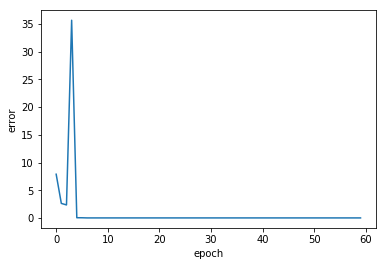

In [5]:
#Visualisations
import matplotlib.pyplot as plt

plt.plot(total_error)
plt.ylabel('error')
plt.xlabel('epoch')
plt.show()